In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("DataSet/AirPassengers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df["Month"] = pd.to_datetime(df["Month"])
df.rename(columns={"#Passengers": "Passengers"}, inplace=True)
df.set_index("Month", inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


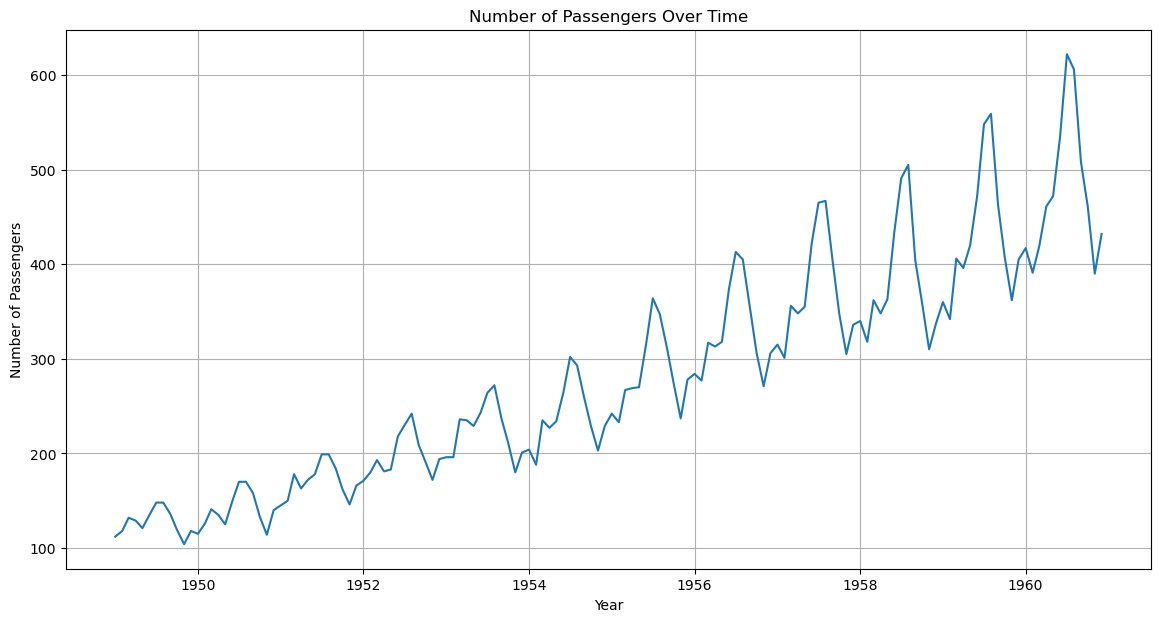

In [5]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
plt.plot(df.Passengers)
plt.title("Number of Passengers Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)


adf_test(df.Passengers)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [8]:
def difference(df, periods=1):
    return df.diff(periods=periods).dropna()


def log(df):
    df = df[df > 0]
    return np.log(df + 1e-6)


def exponential(df):
    return np.exp(df)


def sqr(df):
    return np.sqrt(df)


def pipeline(fc_ls, df):
    res = df
    for f in fc_ls:
        res = f(res)
    return res

In [9]:
fc_ls = [
    lambda df: difference(df, periods=1),
    log,
    exponential,
    lambda df: difference(df, periods=3),
]

transformed = pipeline(fc_ls, df["Passengers"])
transformed_df = pd.DataFrame({"Transformed": transformed})
transformed_df.head()

,Transformed
Month,
1949-07-01,7.0
1949-12-01,0.0
1950-02-01,-3.0
1950-03-01,2.0
1950-06-01,10.0


In [10]:
adf_test(transformed_df.Transformed)

Results of Dickey-Fuller Test:
Test Statistic                 -3.254573
p-value                         0.017035
#Lags Used                     11.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


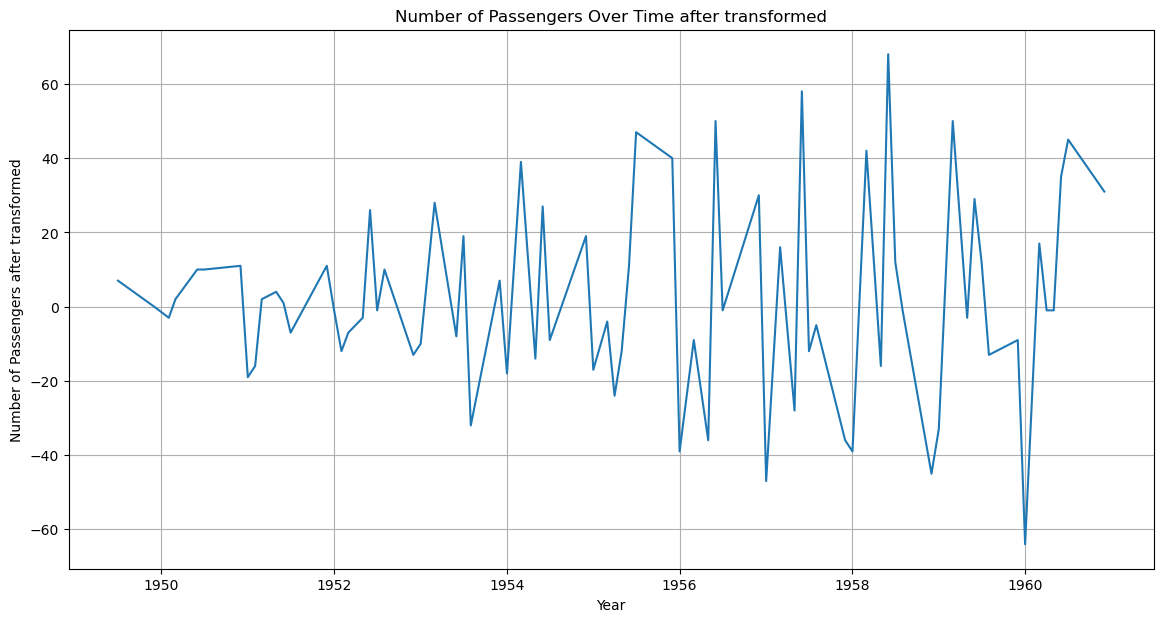

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(transformed_df.Transformed)
plt.title("Number of Passengers Over Time after transformed")
plt.xlabel("Year")
plt.ylabel("Number of Passengers after transformed")
plt.grid(True)
plt.show()

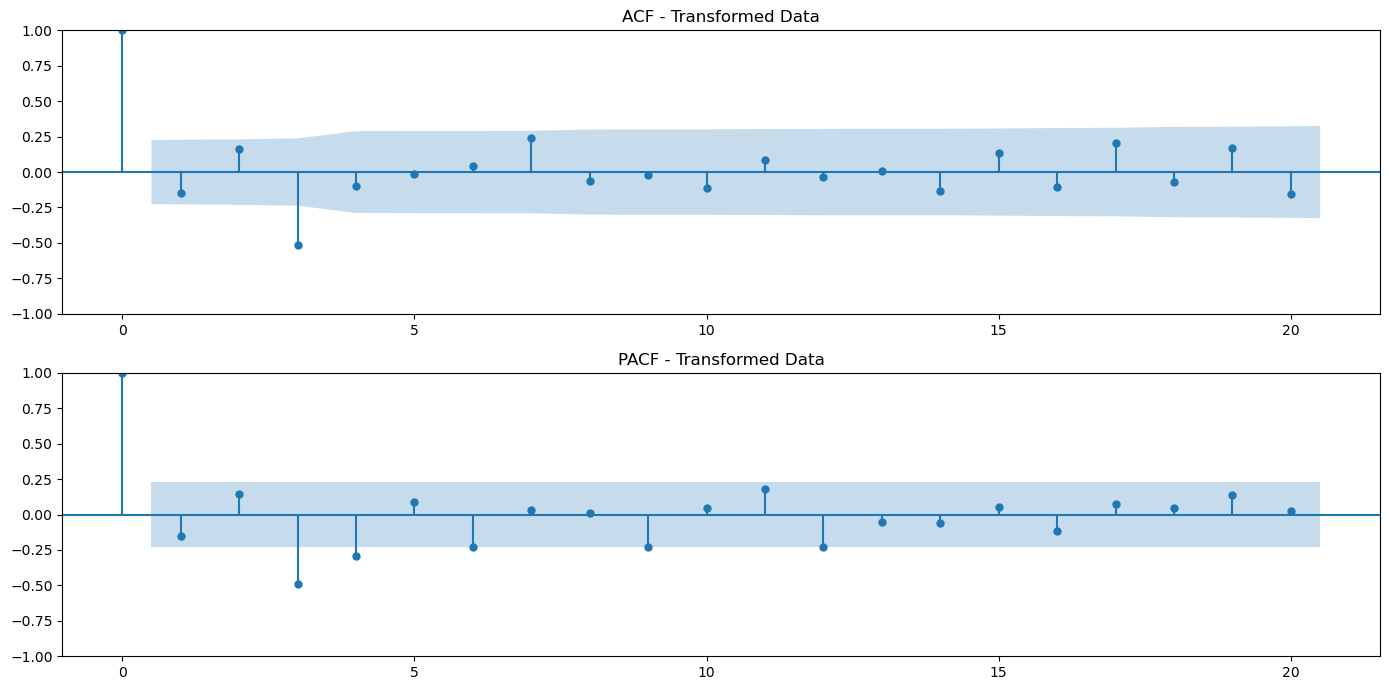

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(14, 7))

plt.subplot(211)
plot_acf(transformed_df.Transformed.dropna(), ax=plt.gca(), lags=20)
plt.title("ACF - Transformed Data")

plt.subplot(212)
plot_pacf(transformed_df.Transformed.dropna(), ax=plt.gca(), lags=20)
plt.title("PACF - Transformed Data")

plt.tight_layout()
plt.show()

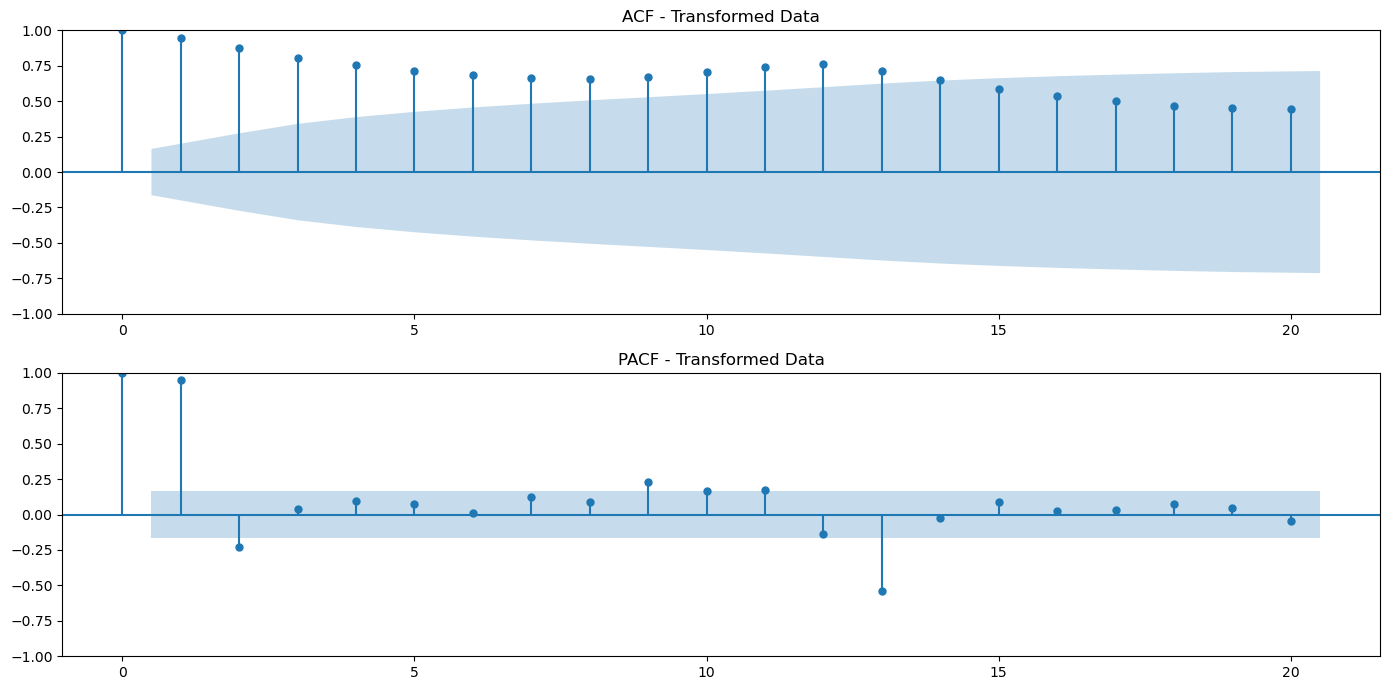

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(14, 7))

plt.subplot(211)
plot_acf(df.dropna(), ax=plt.gca(), lags=20)
plt.title("ACF - Transformed Data")

plt.subplot(212)
plot_pacf(df.dropna(), ax=plt.gca(), lags=20)
plt.title("PACF - Transformed Data")

plt.tight_layout()
plt.show()